# Sentiment Analysis for Social Media Data

## Import required libraries

In [1]:
pip install emoji

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np
import re
import emoji
import nltk
from nltk import ne_chunk, pos_tag
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, SnowballStemmer, PorterStemmer
from nltk.tokenize import word_tokenize
from bs4 import BeautifulSoup

## Download necessary NTLK resources

In [3]:
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [4]:
nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to
[nltk_data]    |     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to
[nltk_data]    |     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_eng to
[nltk_data]    |     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_eng is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_

True

## Step 2. Load Data from Different Social Media Sources

In [5]:
# Load Twitter data
twitter_data1 = pd.read_csv('C:/Users/user/Downloads/OCD_tweets.csv')
twitter_data1['platform'] = 'Twitter'
display(twitter_data1.head())

twitter_data2 = pd.read_csv('C:/Users/user/Downloads/UMHD__tweets.csv')
twitter_data2['platform'] = 'Twitter'
display(twitter_data2.head())

twitter_data3 = pd.read_csv('C:/Users/user/Downloads/MH_Campaigns_tweets1723.csv')
twitter_data3['platform'] = 'Twitter'
display(twitter_data3.head())

twitter_data4 = pd.read_csv('C:/Users/user/Downloads/MHAW__tweets.csv')
twitter_data4['platform'] = 'Twitter'
display(twitter_data4.head())

# Load Reddit data
reddit_data = pd.read_csv('C:/Users/user/Downloads/Combined_reddit_Data.csv')
reddit_data['platform'] = 'Reddit'
display(reddit_data.head())

# Load Forum data
forum_data = pd.read_csv('C:/Users/user/Downloads/mental_health_counseling_conversations.csv')
forum_data['platform'] = 'Forum'
display(forum_data.head())


,Unnamed: 0,Date,ID,url,username,source,location,tweet,num_of_likes,num_of_rt,followers,replies,platform
0,0,2023-02-15 13:48:52+00:00,1.625855e+18,https://twitter.com/haringeyiapt/status/162585...,haringeyiapt,Twitter for iPhone,Haringey,"People with OCD experience intensely negative,...",5,1,317,0,Twitter
1,1,2023-02-09 22:37:56+00:00,1.623813e+18,https://twitter.com/scrupulOCD_KC/status/16238...,scrupulOCD_KC,Twitter for Android,NaN,Hello all I'm Erika an @IOCDF grassroots advoc...,0,0,9,0,Twitter
2,2,2022-10-20 11:30:07+00:00,1.583058e+18,https://twitter.com/FootstepsCandC/status/1583...,FootstepsCandC,SmarterQueue,Gloucester,"In light of last week's OCD Awareness week, we...",0,0,905,0,Twitter
3,3,2022-10-18 19:42:14+00:00,1.582457e+18,https://twitter.com/IOCDF/status/1582457044451...,IOCDF,Twitter Web App,"Boston, MA",The GIFS now have over 1.4 million views on GI...,5,2,19257,0,Twitter
4,4,2022-10-18 19:42:13+00:00,1.582457e+18,https://twitter.com/IOCDF/status/1582457038969...,IOCDF,Twitter Web App,"Boston, MA","The 2022 #OCDweek events, activities, and live...",7,2,19257,1,Twitter


,Unnamed: 0,Date,ID,url,username,source,location,tweet,num_of_likes,num_of_rt,followers,replies,platform
0,0,2023-03-15 19:48:11+00:00,1.636092e+18,https://twitter.com/acamh/status/1636091945859...,acamh,Sprout Social,London,In light of #UniMentalHealthDay (9 March) we e...,5,2,27246,0,Twitter
1,1,2023-03-14 18:20:00+00:00,1.635707e+18,https://twitter.com/CBUK_Scot/status/163570736...,CBUK_Scot,Twitter Web App,"Glasgow, Scotland",Going to university or college can be exciting...,0,0,389,0,Twitter
2,2,2023-03-14 14:17:18+00:00,1.635646e+18,https://twitter.com/StudentMindsOrg/status/163...,StudentMindsOrg,Hootsuite Inc.,United Kingdom,Thank you again to everyone that attended our ...,18,2,24929,0,Twitter
3,3,2023-03-14 12:35:38+00:00,1.635621e+18,https://twitter.com/CityBlock_News/status/1635...,CityBlock_News,Sendible,"Lancaster, Reading & Durham",#UniMentalHealthDay\n\nOur teams in #Lancaster...,1,1,2510,0,Twitter
4,4,2023-03-14 09:13:56+00:00,1.635570e+18,https://twitter.com/UMHANUK/status/16355699423...,UMHANUK,Twitter Web App,"Birmingham, England",Check out this 10 minute video by @project_thi...,5,2,2838,0,Twitter


,Date,ID,url,username,source,location,tweet,likes,rt,followers,replies,campaign,likes_pf,replies_pf,rt_pf,engagement,engagement_0,platform
0,2023-02-15 13:48:52+00:00,1625854658601418753,https://twitter.com/haringeyiapt/status/162585...,haringeyiapt,Twitter for iPhone,Haringey,"People with OCD experience intensely negative,...",5,1,317,0,OCD,0.015773,0.000000,0.006309,0.022082,0.031546,Twitter
1,2023-02-09 22:37:56+00:00,1623813475469344769,https://twitter.com/scrupulOCD_KC/status/16238...,scrupulOCD_KC,Twitter for Android,unknown,Hello all I'm Erika an @IOCDF grassroots advoc...,0,0,9,0,OCD,0.000000,0.000000,0.000000,0.000000,0.000000,Twitter
2,2022-10-20 11:30:07+00:00,1583057973496406016,https://twitter.com/FootstepsCandC/status/1583...,FootstepsCandC,SmarterQueue,Gloucester,"In light of last week's OCD Awareness week, we...",0,0,905,0,OCD,0.000000,0.000000,0.000000,0.000000,0.000000,Twitter
3,2022-10-18 19:42:14+00:00,1582457044451627008,https://twitter.com/IOCDF/status/1582457044451...,IOCDF,Twitter Web App,"Boston, MA",The GIFS now have over 1.4 million views on GI...,5,2,19257,0,OCD,0.000260,0.000000,0.000208,0.000467,0.000519,Twitter
4,2022-10-18 19:42:13+00:00,1582457038969262080,https://twitter.com/IOCDF/status/1582457038969...,IOCDF,Twitter Web App,"Boston, MA","The 2022 #OCDweek events, activities, and live...",7,2,19257,1,OCD,0.000364,0.000156,0.000208,0.000727,0.000779,Twitter


,Unnamed: 0.1,Unnamed: 0,Date,ID,url,username,source,location,tweet,num_of_likes,num_of_rt,followers,replies,platform
0,0,0,2017-12-30 14:50:06+00:00,947117598201778177,https://twitter.com/emc_uk/status/947117598201...,emc_uk,CoSchedule,London,Reflecting back to our #MentalHealthAwareness ...,6,4,21493,0,Twitter
1,1,1,2017-12-30 10:14:42+00:00,947048291090432000,https://twitter.com/WearyWithToil/status/94704...,WearyWithToil,Twitter for Android,She/Her | Cis,Here are some thoughts I shared in May for Men...,0,1,1979,1,Twitter
2,2,2,2017-12-30 06:28:27+00:00,946991352889344002,https://twitter.com/worldIinebeta/status/94699...,worldIinebeta,Twitter for Android,with the nearest dog,@Mort3mer A livestream or video? My high schoo...,0,0,119,0,Twitter
3,3,3,2017-12-29 23:03:04+00:00,946879267777994752,https://twitter.com/SarahMarieGraye/status/946...,SarahMarieGraye,Twitter Web Client,"Canterbury, UK",@Shylasopinions @trigger_press 14-20 May is Me...,2,1,4107,0,Twitter
4,4,4,2017-12-29 22:24:26+00:00,946869548052910080,https://twitter.com/emmxrtal/status/9468695480...,emmxrtal,Tweet Old Post,"Cheshire, UK",Mental #Health Awareness Week 2017 https://t.c...,0,0,4397,0,Twitter


,Unnamed: 0,statement,status,platform
0,0,oh my gosh,Anxiety,Reddit
1,1,"trouble sleeping, confused mind, restless hear...",Anxiety,Reddit
2,2,"All wrong, back off dear, forward doubt. Stay ...",Anxiety,Reddit
3,3,I've shifted my focus to something else but I'...,Anxiety,Reddit
4,4,"I'm restless and restless, it's been a month n...",Anxiety,Reddit


,Context,Response,platform
0,I'm going through some things with my feelings...,"If everyone thinks you're worthless, then mayb...",Forum
1,I'm going through some things with my feelings...,"Hello, and thank you for your question and see...",Forum
2,I'm going through some things with my feelings...,First thing I'd suggest is getting the sleep y...,Forum
3,I'm going through some things with my feelings...,Therapy is essential for those that are feelin...,Forum
4,I'm going through some things with my feelings...,I first want to let you know that you are not ...,Forum


# Merge the Datasets

We need to combine all the datasets into a single DataFrame to streamline preprocessing and analysis.

To do this:

* Ensure all datasets have consistent column names.
* Use pd.concat() to merge datasets while preserving the platform column.

In [6]:
# Step 1: Standardize column names before merging
twitter_data = pd.concat([twitter_data1, twitter_data2, twitter_data3, twitter_data4], ignore_index=True)
twitter_data = twitter_data.rename(columns={"tweet": "twitter_text"})
reddit_data = reddit_data.rename(columns={"statement": "text", "status": "label"})
forum_data = forum_data.rename(columns={"Context": "text", "Response": "label"})

# Step 2: Merge datasets
all_data = pd.concat([
    twitter_data[['platform', 'twitter_text']],
    reddit_data[['platform', 'text']],
    forum_data[['platform', 'text']]
], ignore_index=True)

# Step 3: Consolidate text columns into one and drop NaN-filled columns
all_data['text'] = all_data['twitter_text'].fillna(
    all_data['text']).fillna(all_data['text'])
all_data = all_data[['platform', 'text']]  # Keep only the relevant columns

# Step 4: Display results
print(all_data.columns)  # Confirm column names
display(all_data.head())  # Display the first few rows
display(all_data.tail())  # Display the last few rows


Index(['platform', 'text'], dtype='object')


,platform,text
0,Twitter,"People with OCD experience intensely negative,..."
1,Twitter,Hello all I'm Erika an @IOCDF grassroots advoc...
2,Twitter,"In light of last week's OCD Awareness week, we..."
3,Twitter,The GIFS now have over 1.4 million views on GI...
4,Twitter,"The 2022 #OCDweek events, activities, and live..."


,platform,text
1360828,Forum,The birth mother attempted suicide several tim...
1360829,Forum,I think adult life is making him depressed and...
1360830,Forum,I just took a job that requires me to travel f...
1360831,Forum,NaN
1360832,Forum,NaN


# Quick Overview of the Data
Perform the following:

* Inspect data types.
* Count null values.
* Fill missing/null values appropriately.

In [7]:
# Inspect data types
print("Data Types:")
print(all_data.dtypes)

Data Types:
platform    object
text        object
dtype: object


In [8]:
# Count null values
print("\nCount of Null Values:")
print(all_data.isnull().sum())


Count of Null Values:
platform      0
text        364
dtype: int64


In [9]:
# Fill null values with empty strings for text
all_data['text'] = all_data['text'].fillna("")

In [10]:
print(all_data.isnull().sum())

platform    0
text        0
dtype: int64


# Visualize the Data Distribution

* Step 1: Analyze the Platform Distribution
-- Bar Plot: Count the number of records from each platform.

* Step 2: Analyze Text Characteristics
-- Box Plot: Visualize the distribution of text lengths for each platform.
-- Histogram: Show the overall distribution of text lengths to identify trends and outliers.

* Step 3: Word Analysis
-- Word Cloud: Generate word clouds for an overview of common terms.
-- Top Words by Platform: Show the most frequent words used per platform.

C:\Users\User\AppData\Local\Temp\ipykernel_13544\1221635401.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=all_data, x='platform', palette='viridis')


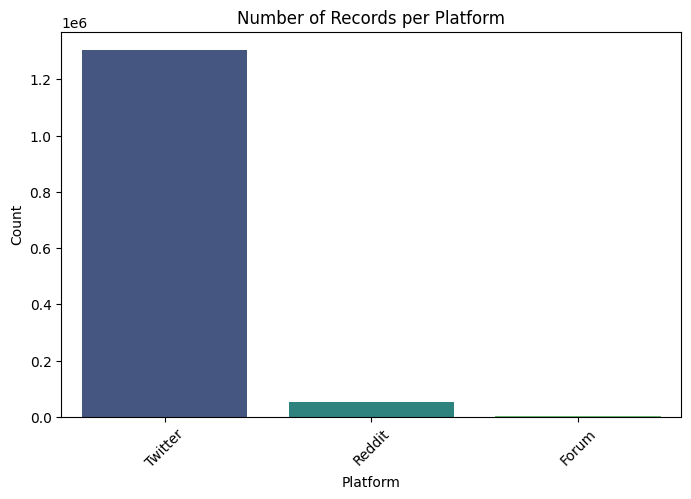

C:\Users\User\AppData\Local\Temp\ipykernel_13544\1221635401.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=all_data, x='platform', y='text_length', palette='viridis')


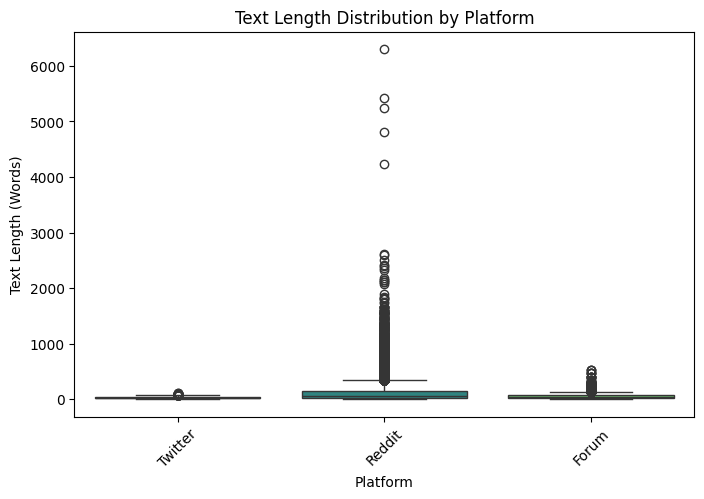

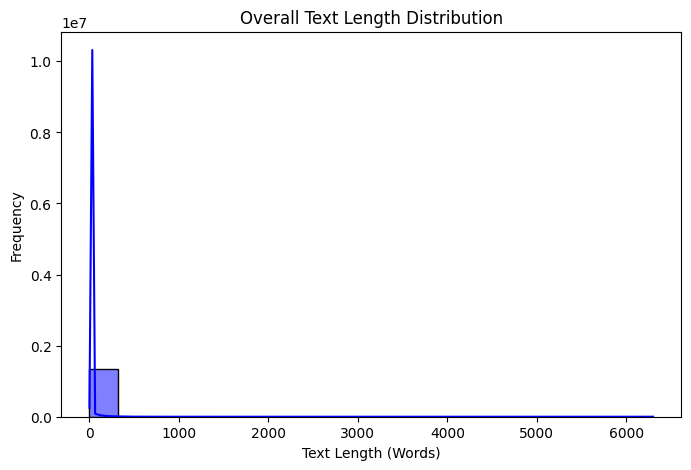

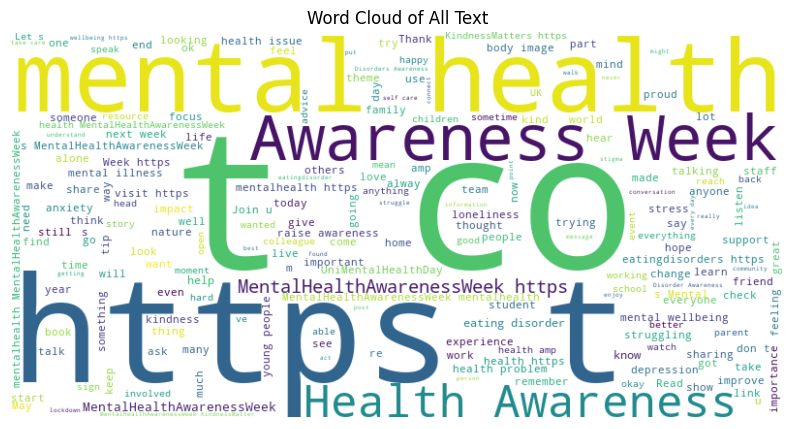

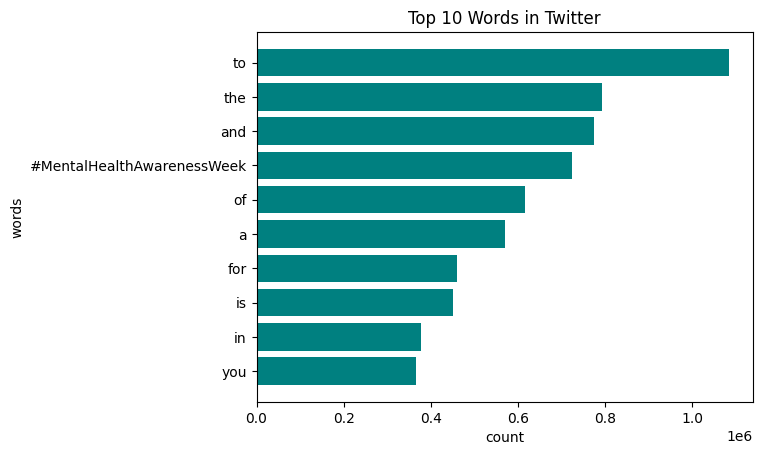

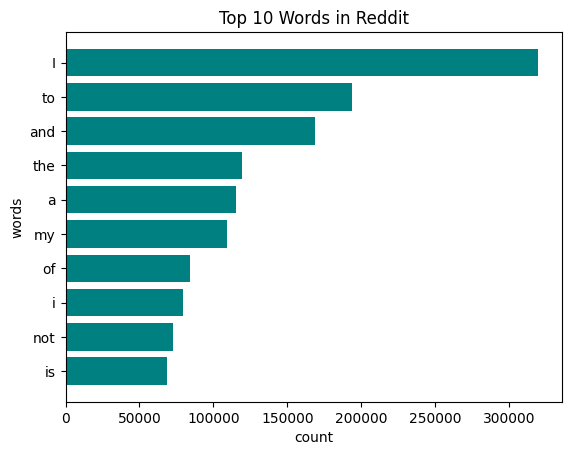

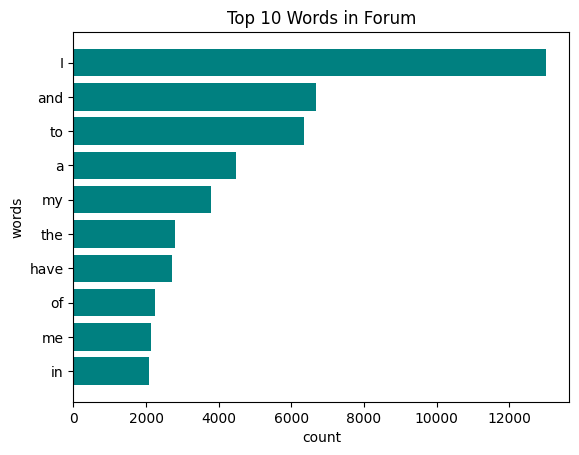

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

# Add a column for text length
all_data['text_length'] = all_data['text'].apply(lambda x: len(x.split()))

# Plot 1: Platform Distribution
plt.figure(figsize=(8, 5))
sns.countplot(data=all_data, x='platform', palette='viridis')
plt.title('Number of Records per Platform')
plt.xlabel('Platform')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

# Plot 2: Box Plot of Text Length by Platform
plt.figure(figsize=(8, 5))
sns.boxplot(data=all_data, x='platform', y='text_length', palette='viridis')
plt.title('Text Length Distribution by Platform')
plt.xlabel('Platform')
plt.ylabel('Text Length (Words)')
plt.xticks(rotation=45)
plt.show()

# Plot 3: Histogram of Text Length
plt.figure(figsize=(8, 5))
sns.histplot(all_data['text_length'], bins=20, kde=True, color='blue')
plt.title('Overall Text Length Distribution')
plt.xlabel('Text Length (Words)')
plt.ylabel('Frequency')
plt.show()

# Plot 4: Word Cloud for All Text
all_text = " ".join(all_data['text'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_text)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of All Text')
plt.show()

# Top Words by Platform
from collections import Counter

def plot_top_words(data, platform, n=10):
    platform_text = " ".join(data[data['platform'] == platform]['text'])
    word_counts = Counter(platform_text.split()).most_common(n)
    words, counts = zip(*word_counts)
    plt.barh(words, counts, color='teal')
    plt.title(f'Top {n} Words in {platform}')
    plt.xlabel('count')
    plt.ylabel('words')
    plt.gca().invert_yaxis()
    plt.show()

# Plot top words for each platform
for platform in all_data['platform'].unique():
    plot_top_words(all_data, platform, n=10)


## Visualization Breakdown
1. Bar Plot (Platform Distribution):

* Displays the count of records for each platform.
* Helps identify which platform has the most/least data.
2. Box Plot (Text Length Distribution):

* Compares text length variability across platforms.
* Highlights outliers and median text lengths.
3. Histogram (Text Length Distribution):

* Provides an overview of text length frequencies in the dataset.
4. Word Cloud:

* Shows the most frequent words in the dataset, highlighting common themes.
5. Top Words by Platform:

* Gives insight into platform-specific terminology.

# Data Preprocessing

## a) Anonymization
Replace personal identifiers (like usernames or emails).

In [12]:
import re

# Refined function to anonymize sensitive information
def anonymize_text(text):
    # Replace usernames (e.g., @username)
    text = re.sub(r"@\w+", "[USER]", text)

    # Replace emails
    text = re.sub(r"\S+@\S+", "[EMAIL]", text)

    # Replace full names (refined heuristic)
    # Match names with one or two capitalized words but exclude common sentence starters
    text = re.sub(
        r"\b(?!The|In|With|On|At|By|A|An|For|Of|And|To|From|As|Is|It|Be|We)\b[A-Z][a-z]+\b(?: [A-Z][a-z]+)?",
        "[NAME]",
        text
    )

    # Remove occurrences of the word "name" (which appears frequently in your cleaned text)
    text = re.sub(r'\bname\b', '', text)

    return text

# Apply the anonymization function to the 'cleaned_text' column
all_data['cleaned_text'] = all_data['text'].apply(anonymize_text)

# Display the corrected result
all_data.head()

,platform,text,text_length,cleaned_text
0,Twitter,"People with OCD experience intensely negative,...",45,"[NAME] with OCD experience intensely negative,..."
1,Twitter,Hello all I'm Erika an @IOCDF grassroots advoc...,45,[NAME] all I'm [NAME] an [USER] grassroots adv...
2,Twitter,"In light of last week's OCD Awareness week, we...",44,"In light of last week's OCD Awareness week, we..."
3,Twitter,The GIFS now have over 1.4 million views on GI...,47,The GIFS now have over 1.4 million views on GI...
4,Twitter,"The 2022 #OCDweek events, activities, and live...",39,"The 2022 #OCDweek events, activities, and live..."


In [13]:
all_data.head(10)

,platform,text,text_length,cleaned_text
0,Twitter,"People with OCD experience intensely negative,...",45,"[NAME] with OCD experience intensely negative,..."
1,Twitter,Hello all I'm Erika an @IOCDF grassroots advoc...,45,[NAME] all I'm [NAME] an [USER] grassroots adv...
2,Twitter,"In light of last week's OCD Awareness week, we...",44,"In light of last week's OCD Awareness week, we..."
3,Twitter,The GIFS now have over 1.4 million views on GI...,47,The GIFS now have over 1.4 million views on GI...
4,Twitter,"The 2022 #OCDweek events, activities, and live...",39,"The 2022 #OCDweek events, activities, and live..."
5,Twitter,Did you catch last week's Ask The Experts live...,42,[NAME] you catch last week's Ask The [NAME] li...
6,Twitter,Did you miss our Facebook livestream with Dr. ...,39,[NAME] you miss our [NAME] livestream with [NA...
7,Twitter,OCD impacts around 3% of Victorians. Education...,43,OCD impacts around 3% of [NAME]. [NAME] &amp; ...
8,Twitter,Today is the last day of OCD Awareness Week. R...,25,Today is the last day of OCD Awareness Week. [...
9,Twitter,"""It was miraculous. I immediately felt a diffe...",33,"""It was miraculous. I immediately felt a diffe..."


## c) Convert to Lowercase
Standardize text by converting all characters to lowercase.

In [14]:
all_data['cleaned_text'] = all_data['cleaned_text'].str.lower()
all_data.head()

,platform,text,text_length,cleaned_text
0,Twitter,"People with OCD experience intensely negative,...",45,"[name] with ocd experience intensely negative,..."
1,Twitter,Hello all I'm Erika an @IOCDF grassroots advoc...,45,[name] all i'm [name] an [user] grassroots adv...
2,Twitter,"In light of last week's OCD Awareness week, we...",44,"in light of last week's ocd awareness week, we..."
3,Twitter,The GIFS now have over 1.4 million views on GI...,47,the gifs now have over 1.4 million views on gi...
4,Twitter,"The 2022 #OCDweek events, activities, and live...",39,"the 2022 #ocdweek events, activities, and live..."


## d) Remove HTML Tags
Remove HTML elements using BeautifulSoup.

In [15]:
from bs4 import BeautifulSoup

all_data['cleaned_text'] = all_data['cleaned_text'].apply(lambda x: BeautifulSoup(x, "html.parser").get_text())
all_data.head()

C:\Users\User\AppData\Local\Temp\ipykernel_13544\3273536459.py:3: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  all_data['cleaned_text'] = all_data['cleaned_text'].apply(lambda x: BeautifulSoup(x, "html.parser").get_text())
C:\Users\User\AppData\Local\Temp\ipykernel_13544\3273536459.py:3: MarkupResemblesLocatorWarning: The input looks more like a URL than markup. You may want to use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  all_data['cleaned_text'] = all_data['cleaned_text'].apply(lambda x: BeautifulSoup(x, "html.parser").get_text())


,platform,text,text_length,cleaned_text
0,Twitter,"People with OCD experience intensely negative,...",45,"[name] with ocd experience intensely negative,..."
1,Twitter,Hello all I'm Erika an @IOCDF grassroots advoc...,45,[name] all i'm [name] an [user] grassroots adv...
2,Twitter,"In light of last week's OCD Awareness week, we...",44,"in light of last week's ocd awareness week, we..."
3,Twitter,The GIFS now have over 1.4 million views on GI...,47,the gifs now have over 1.4 million views on gi...
4,Twitter,"The 2022 #OCDweek events, activities, and live...",39,"the 2022 #ocdweek events, activities, and live..."


## e) Remove URLs
Strip URLs from text.

In [16]:
all_data['cleaned_text'] = all_data['cleaned_text'].apply(lambda x: re.sub(r"http\S+|www\S+", "", x))
all_data.head()

,platform,text,text_length,cleaned_text
0,Twitter,"People with OCD experience intensely negative,...",45,"[name] with ocd experience intensely negative,..."
1,Twitter,Hello all I'm Erika an @IOCDF grassroots advoc...,45,[name] all i'm [name] an [user] grassroots adv...
2,Twitter,"In light of last week's OCD Awareness week, we...",44,"in light of last week's ocd awareness week, we..."
3,Twitter,The GIFS now have over 1.4 million views on GI...,47,the gifs now have over 1.4 million views on gi...
4,Twitter,"The 2022 #OCDweek events, activities, and live...",39,"the 2022 #ocdweek events, activities, and live..."


## f) Remove Numbers
Remove numerical values.

In [17]:
all_data['cleaned_text'] = all_data['cleaned_text'].apply(lambda x: re.sub(r"\b\d+\b", "", x))
all_data.head()

,platform,text,text_length,cleaned_text
0,Twitter,"People with OCD experience intensely negative,...",45,"[name] with ocd experience intensely negative,..."
1,Twitter,Hello all I'm Erika an @IOCDF grassroots advoc...,45,[name] all i'm [name] an [user] grassroots adv...
2,Twitter,"In light of last week's OCD Awareness week, we...",44,"in light of last week's ocd awareness week, we..."
3,Twitter,The GIFS now have over 1.4 million views on GI...,47,the gifs now have over . million views on giph...
4,Twitter,"The 2022 #OCDweek events, activities, and live...",39,"the #ocdweek events, activities, and livestre..."


## g) Remove Measurements
Strip units like "km," "lbs," etc.

In [18]:
units = ["km", "lbs", "kg", "cm", "ml", "mm", "in", "ft", "miles"]
unit_pattern = r'\b(' + '|'.join(units) + r')\b'

all_data['cleaned_text'] = all_data['cleaned_text'].apply(lambda x: re.sub(unit_pattern, "", x))
all_data.head()

,platform,text,text_length,cleaned_text
0,Twitter,"People with OCD experience intensely negative,...",45,"[name] with ocd experience intensely negative,..."
1,Twitter,Hello all I'm Erika an @IOCDF grassroots advoc...,45,[name] all i'm [name] an [user] grassroots adv...
2,Twitter,"In light of last week's OCD Awareness week, we...",44,"light of last week's ocd awareness week, we w..."
3,Twitter,The GIFS now have over 1.4 million views on GI...,47,the gifs now have over . million views on giph...
4,Twitter,"The 2022 #OCDweek events, activities, and live...",39,"the #ocdweek events, activities, and livestre..."


## h) Remove Emojis
Strip emojis using regex.

In [19]:
import emoji

all_data['cleaned_text'] = all_data['cleaned_text'].apply(lambda x: emoji.replace_emoji(x, ""))
all_data.head()

,platform,text,text_length,cleaned_text
0,Twitter,"People with OCD experience intensely negative,...",45,"[name] with ocd experience intensely negative,..."
1,Twitter,Hello all I'm Erika an @IOCDF grassroots advoc...,45,[name] all i'm [name] an [user] grassroots adv...
2,Twitter,"In light of last week's OCD Awareness week, we...",44,"light of last week's ocd awareness week, we w..."
3,Twitter,The GIFS now have over 1.4 million views on GI...,47,the gifs now have over . million views on giph...
4,Twitter,"The 2022 #OCDweek events, activities, and live...",39,"the #ocdweek events, activities, and livestre..."


## i) Remove Filler Words
Define and remove common filler words like "um," "uh," etc.

In [20]:
filler_words = ["um", "uh", "like", "you know", "so", "well"]
filler_pattern = r'\b(' + '|'.join(filler_words) + r')\b'

all_data['cleaned_text'] = all_data['cleaned_text'].apply(lambda x: re.sub(filler_pattern, "", x))
all_data.head()

,platform,text,text_length,cleaned_text
0,Twitter,"People with OCD experience intensely negative,...",45,"[name] with ocd experience intensely negative,..."
1,Twitter,Hello all I'm Erika an @IOCDF grassroots advoc...,45,[name] all i'm [name] an [user] grassroots adv...
2,Twitter,"In light of last week's OCD Awareness week, we...",44,"light of last week's ocd awareness week, we w..."
3,Twitter,The GIFS now have over 1.4 million views on GI...,47,the gifs now have over . million views on giph...
4,Twitter,"The 2022 #OCDweek events, activities, and live...",39,"the #ocdweek events, activities, and livestre..."


## j) Remove Punctuation
Strip punctuation marks.

In [21]:
import string

all_data['cleaned_text'] = all_data['cleaned_text'].apply(lambda x: x.translate(str.maketrans("", "", string.punctuation)))
all_data.head()

,platform,text,text_length,cleaned_text
0,Twitter,"People with OCD experience intensely negative,...",45,name with ocd experience intensely negative re...
1,Twitter,Hello all I'm Erika an @IOCDF grassroots advoc...,45,name all im name an user grassroots advocate t...
2,Twitter,"In light of last week's OCD Awareness week, we...",44,light of last weeks ocd awareness week we wan...
3,Twitter,The GIFS now have over 1.4 million views on GI...,47,the gifs now have over million views on giphy...
4,Twitter,"The 2022 #OCDweek events, activities, and live...",39,the ocdweek events activities and livestreams...


## k) Remove Special Characters
Remove non-alphanumeric characters.

In [22]:
all_data['cleaned_text'] = all_data['cleaned_text'].apply(lambda x: re.sub(r'[^A-Za-z0-9\s]', '', x))
all_data.head()

,platform,text,text_length,cleaned_text
0,Twitter,"People with OCD experience intensely negative,...",45,name with ocd experience intensely negative re...
1,Twitter,Hello all I'm Erika an @IOCDF grassroots advoc...,45,name all im name an user grassroots advocate t...
2,Twitter,"In light of last week's OCD Awareness week, we...",44,light of last weeks ocd awareness week we wan...
3,Twitter,The GIFS now have over 1.4 million views on GI...,47,the gifs now have over million views on giphy...
4,Twitter,"The 2022 #OCDweek events, activities, and live...",39,the ocdweek events activities and livestreams...


## l) Remove Stop Words
Remove frequent but irrelevant words.

In [23]:
from nltk.corpus import stopwords
import nltk

nltk.download("stopwords")
stop_words = set(stopwords.words("english"))

all_data['cleaned_text'] = all_data['cleaned_text'].apply(lambda x: " ".join([word for word in x.split() if word not in stop_words]))
all_data.head()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,platform,text,text_length,cleaned_text
0,Twitter,"People with OCD experience intensely negative,...",45,name ocd experience intensely negative repetit...
1,Twitter,Hello all I'm Erika an @IOCDF grassroots advoc...,45,name im name user grassroots advocate loves ro...
2,Twitter,"In light of last week's OCD Awareness week, we...",44,light last weeks ocd awareness week wanted off...
3,Twitter,The GIFS now have over 1.4 million views on GI...,47,gifs million views giphy hope campaign shifts ...
4,Twitter,"The 2022 #OCDweek events, activities, and live...",39,ocdweek events activities livestreams led amaz...


## m) Tokenization
Split sentences into tokens.

In [24]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [25]:
from nltk.tokenize import word_tokenize

nltk.download("punkt")
all_data['tokens'] = all_data['cleaned_text'].apply(word_tokenize)
all_data.head()

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


,platform,text,text_length,cleaned_text,tokens
0,Twitter,"People with OCD experience intensely negative,...",45,name ocd experience intensely negative repetit...,"[name, ocd, experience, intensely, negative, r..."
1,Twitter,Hello all I'm Erika an @IOCDF grassroots advoc...,45,name im name user grassroots advocate loves ro...,"[name, im, name, user, grassroots, advocate, l..."
2,Twitter,"In light of last week's OCD Awareness week, we...",44,light last weeks ocd awareness week wanted off...,"[light, last, weeks, ocd, awareness, week, wan..."
3,Twitter,The GIFS now have over 1.4 million views on GI...,47,gifs million views giphy hope campaign shifts ...,"[gifs, million, views, giphy, hope, campaign, ..."
4,Twitter,"The 2022 #OCDweek events, activities, and live...",39,ocdweek events activities livestreams led amaz...,"[ocdweek, events, activities, livestreams, led..."


In [26]:
all_data.head(30)

,platform,text,text_length,cleaned_text,tokens
0,Twitter,"People with OCD experience intensely negative,...",45,name ocd experience intensely negative repetit...,"[name, ocd, experience, intensely, negative, r..."
1,Twitter,Hello all I'm Erika an @IOCDF grassroots advoc...,45,name im name user grassroots advocate loves ro...,"[name, im, name, user, grassroots, advocate, l..."
2,Twitter,"In light of last week's OCD Awareness week, we...",44,light last weeks ocd awareness week wanted off...,"[light, last, weeks, ocd, awareness, week, wan..."
3,Twitter,The GIFS now have over 1.4 million views on GI...,47,gifs million views giphy hope campaign shifts ...,"[gifs, million, views, giphy, hope, campaign, ..."
4,Twitter,"The 2022 #OCDweek events, activities, and live...",39,ocdweek events activities livestreams led amaz...,"[ocdweek, events, activities, livestreams, led..."
5,Twitter,Did you catch last week's Ask The Experts live...,42,name catch last weeks ask name livestream name...,"[name, catch, last, weeks, ask, name, livestre..."
6,Twitter,Did you miss our Facebook livestream with Dr. ...,39,name miss name livestream name name ocd patien...,"[name, miss, name, livestream, name, name, ocd..."
7,Twitter,OCD impacts around 3% of Victorians. Education...,43,ocd impacts around name name awareness goes lo...,"[ocd, impacts, around, name, name, awareness, ..."
8,Twitter,Today is the last day of OCD Awareness Week. R...,25,today last day ocd awareness week name ocd isn...,"[today, last, day, ocd, awareness, week, name,..."
9,Twitter,"""It was miraculous. I immediately felt a diffe...",33,miraculous immediately felt difference name br...,"[miraculous, immediately, felt, difference, na..."


In [27]:
all_data.tail(30)

,platform,text,text_length,cleaned_text,tokens
1360803,Forum,"Our relationship ended about 7 years ago, but ...",24,name relationship ended years ago dont know le...,"[name, relationship, ended, years, ago, dont, ..."
1360804,Forum,My husband and I had our first threesome recen...,58,name husband first threesome recently name dri...,"[name, husband, first, threesome, recently, na..."
1360805,Forum,I have PTSD. The side effects are really bad a...,32,ptsd side effects really bad impacts sex anger...,"[ptsd, side, effects, really, bad, impacts, se..."
1360806,Forum,"After first meeting the client, what is the pr...",13,first meeting client process counselor facilit...,"[first, meeting, client, process, counselor, f..."
1360807,Forum,I'm in my late teens and live with my dad. Th...,68,im late teens live dad time go college classes...,"[im, late, teens, live, dad, time, go, college..."
1360808,Forum,I know that I need to get past my feelings for...,90,know need get past feelings person fell love t...,"[know, need, get, past, feelings, person, fell..."
1360809,Forum,I want to live with my mom. My dad gets angry ...,64,want live mom name dad gets angry makes feel e...,"[want, live, mom, name, dad, gets, angry, make..."
1360810,Forum,We rent from from my boyfriend's parents. His ...,104,rent boyfriends parents name father drops unan...,"[rent, boyfriends, parents, name, father, drop..."
1360811,Forum,My dad makes me feel like shit and like I'm wo...,41,name dad makes feel shit im worthless name cal...,"[name, dad, makes, feel, shit, im, worthless, ..."
1360812,Forum,I just took a job that requires me to travel f...,50,took job requires travel far away home name fa...,"[took, job, requires, travel, far, away, home,..."


# Sentiment Classification

### Using VADER Sentiment Analyzer
Use a pre-trained sentiment analysis tool (e.g., VADER, TextBlob, or BERT-based models) to identify sentiments.

Generating Mental Health Labels Since the dataset does not have explicit labels, we can create them using rules-based labeling

**Multilabel Classification:** Expand from binary classification to identify specific mental health disorders using the DSM-5 categories

Multilabel Classification
* To map the text to specific DSM-5 categories, we will:

* Create a dictionary mapping DSM-5 disorders to relevant keywords and phrases.

* Assign multilabel classifications using a scoring system where text can belong to multiple categories.

In [28]:
from nltk.sentiment import SentimentIntensityAnalyzer
import pandas as pd

# Initialize VADER Sentiment Analyzer
sia = SentimentIntensityAnalyzer()

# Define refined keyword dictionary for DSM-5 categories
mental_health_keywords = {
    'Neurodevelopmental Disorders': ['autism', 'adhd', 'learning disability', 'speech delay'],
    'Schizophrenia Spectrum Disorders': ['hallucination', 'delusion', 'paranoia', 'psychotic'],
    'Bipolar Disorders': ['manic', 'hypomanic', 'mood swing', 'euphoric', 'irritable'],
    'Depressive Disorders': ['depressed', 'hopeless', 'worthless', 'sad', 'suicide', 'crying'],
    'Anxiety Disorders': ['anxious', 'panic', 'phobia', 'nervous', 'worried', 'tense'],
    'Obsessive-Compulsive Disorders': ['ocd', 'compulsive', 'obsessive', 'ritual', 'hoarding'],
    'Trauma- and Stressor-Related Disorders': ['ptsd', 'trauma', 'abuse', 'flashback', 'hypervigilance'],
    'Eating Disorders': ['anorexia', 'bulimia', 'binge eating', 'purging', 'overeating'],
    'Sleep-Wake Disorders': ['insomnia', 'nightmare', 'narcolepsy', 'sleepwalking', 'fatigue'],
    'Substance Use Disorders': ['addiction', 'withdrawal', 'alcoholic', 'drug abuse', 'dependence'],
    'Personality Disorders': ['borderline', 'antisocial', 'narcissistic', 'avoidant', 'paranoid'],
}

# Function to detect specific mental health disorders
def detect_disorders(text):
    detected = []
    for category, keywords in mental_health_keywords.items():
        if any(keyword in text.lower() for keyword in keywords):
            detected.append(category)
    return detected

# Function to assign binary target and mental_health_labels
def assign_labels(text):
    sentiment = sia.polarity_scores(text)
    negative_score = sentiment['neg']
    detected_disorders = detect_disorders(text)
    
    # Binary target: 1 if disorders detected or strong negative sentiment, else 0
    binary_target = 1 if negative_score > 0.5 or detected_disorders else 0
    
    return detected_disorders, binary_target


# Apply labeling
all_data[['mental_health_labels', 'target']] = all_data['cleaned_text'].apply(
    lambda x: pd.Series(assign_labels(x))
)

# Display the dataset
all_data.head(10)


,platform,text,text_length,cleaned_text,tokens,mental_health_labels,target
0,Twitter,"People with OCD experience intensely negative,...",45,name ocd experience intensely negative repetit...,"[name, ocd, experience, intensely, negative, r...","[Anxiety Disorders, Obsessive-Compulsive Disor...",1
1,Twitter,Hello all I'm Erika an @IOCDF grassroots advoc...,45,name im name user grassroots advocate loves ro...,"[name, im, name, user, grassroots, advocate, l...",[Obsessive-Compulsive Disorders],1
2,Twitter,"In light of last week's OCD Awareness week, we...",44,light last weeks ocd awareness week wanted off...,"[light, last, weeks, ocd, awareness, week, wan...",[Obsessive-Compulsive Disorders],1
3,Twitter,The GIFS now have over 1.4 million views on GI...,47,gifs million views giphy hope campaign shifts ...,"[gifs, million, views, giphy, hope, campaign, ...",[Obsessive-Compulsive Disorders],1
4,Twitter,"The 2022 #OCDweek events, activities, and live...",39,ocdweek events activities livestreams led amaz...,"[ocdweek, events, activities, livestreams, led...",[Obsessive-Compulsive Disorders],1
5,Twitter,Did you catch last week's Ask The Experts live...,42,name catch last weeks ask name livestream name...,"[name, catch, last, weeks, ask, name, livestre...",[Obsessive-Compulsive Disorders],1
6,Twitter,Did you miss our Facebook livestream with Dr. ...,39,name miss name livestream name name ocd patien...,"[name, miss, name, livestream, name, name, ocd...",[Obsessive-Compulsive Disorders],1
7,Twitter,OCD impacts around 3% of Victorians. Education...,43,ocd impacts around name name awareness goes lo...,"[ocd, impacts, around, name, name, awareness, ...",[Obsessive-Compulsive Disorders],1
8,Twitter,Today is the last day of OCD Awareness Week. R...,25,today last day ocd awareness week name ocd isn...,"[today, last, day, ocd, awareness, week, name,...",[Obsessive-Compulsive Disorders],1
9,Twitter,"""It was miraculous. I immediately felt a diffe...",33,miraculous immediately felt difference name br...,"[miraculous, immediately, felt, difference, na...",[Obsessive-Compulsive Disorders],1


In [29]:
all_data.tail(30)

,platform,text,text_length,cleaned_text,tokens,mental_health_labels,target
1360803,Forum,"Our relationship ended about 7 years ago, but ...",24,name relationship ended years ago dont know le...,"[name, relationship, ended, years, ago, dont, ...",[],0
1360804,Forum,My husband and I had our first threesome recen...,58,name husband first threesome recently name dri...,"[name, husband, first, threesome, recently, na...",[],0
1360805,Forum,I have PTSD. The side effects are really bad a...,32,ptsd side effects really bad impacts sex anger...,"[ptsd, side, effects, really, bad, impacts, se...",[Trauma- and Stressor-Related Disorders],1
1360806,Forum,"After first meeting the client, what is the pr...",13,first meeting client process counselor facilit...,"[first, meeting, client, process, counselor, f...",[],0
1360807,Forum,I'm in my late teens and live with my dad. Th...,68,im late teens live dad time go college classes...,"[im, late, teens, live, dad, time, go, college...",[Depressive Disorders],1
1360808,Forum,I know that I need to get past my feelings for...,90,know need get past feelings person fell love t...,"[know, need, get, past, feelings, person, fell...",[],0
1360809,Forum,I want to live with my mom. My dad gets angry ...,64,want live mom name dad gets angry makes feel e...,"[want, live, mom, name, dad, gets, angry, make...",[],0
1360810,Forum,We rent from from my boyfriend's parents. His ...,104,rent boyfriends parents name father drops unan...,"[rent, boyfriends, parents, name, father, drop...",[],0
1360811,Forum,My dad makes me feel like shit and like I'm wo...,41,name dad makes feel shit im worthless name cal...,"[name, dad, makes, feel, shit, im, worthless, ...",[Depressive Disorders],1
1360812,Forum,I just took a job that requires me to travel f...,50,took job requires travel far away home name fa...,"[took, job, requires, travel, far, away, home,...",[],0


## Analyze class distribution

In [30]:
print(all_data['target'].value_counts())


target
0    1241669
1     119164
Name: count, dtype: int64


In [31]:
all_data['mental_health_labels'].value_counts()

mental_health_labels
[]                                                                                                                                                                 1250328
[Depressive Disorders]                                                                                                                                               34283
[Eating Disorders]                                                                                                                                                   17314
[Trauma- and Stressor-Related Disorders]                                                                                                                             13264
[Anxiety Disorders]                                                                                                                                                  13097
                                                                                                                            

## Managing Class Imbalance
Once the dataset is labeled:

#### Apply SMOTE Techniques

Apply techniques like SMOTE (Synthetic Minority Oversampling Technique) or class weighting to ensure balanced training for machine learning models.

Managing class imbalance is critical, especially if the dataset is heavily skewed (as indicated by the target class counts above). 

This ensures that the model doesn't become biased toward the majority class.

### Handling Imbalanced Data
#### Objective:
Use SMOTE to address class imbalance in the dataset, ensuring the model can learn equally well for both majority and minority classes.

In [33]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
from transformers import BertTokenizer, TFBertForSequenceClassification
import tensorflow as tf
import pandas as pd


C:\Users\User\AppData\Roaming\Python\Python312\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# Vectorization

### TF-IDF Vectorization



TF-IDF helps represent text in a meaningful way while reducing the impact of common words.

This gives a  sparse matrix of TF-IDF features.

Prepare the text data for machine learning models by transforming raw text into a numerical format using TF-IDF Vectorization. 

This ensures the data is ready for both basic and deep learning models.

In [34]:
# Initialize TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
X_tfidf = tfidf_vectorizer.fit_transform(all_data['cleaned_text'])

# Extract target labels
y = all_data['target']

# Encode the labels (SMOTE works with numeric labels)
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Apply SMOTE to balance the dataset
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_tfidf, y_encoded)

# Display resampled dataset shape and label distribution
print("Resampled dataset shape:")
print(f"Features shape: {X_resampled.shape}")
print(f"Labels distribution: {pd.Series(y_resampled).value_counts()}")


Resampled dataset shape:
Features shape: (2483338, 5000)
Labels distribution: 1    1241669
0    1241669
Name: count, dtype: int64


### Bag of words

Bag of Words is another feature representation technique that counts word occurrences without considering term importance.

It's useful to compare performance with TF-IDF.

It gives sparse matrix of word counts.

In [36]:
from sklearn.feature_extraction.text import CountVectorizer

# Initialize Count Vectorizer
bow_vectorizer = CountVectorizer(max_features=5000)

# Fit and transform cleaned text
bow_features = bow_vectorizer.fit_transform(all_data['cleaned_text'])

# To inspect the sparse matrix shape and feature names:
print(f"Sparse matrix shape: {bow_features.shape}")
print(f"First 10 feature names: {bow_vectorizer.get_feature_names_out()[:10]}")

Sparse matrix shape: (1360833, 5000)
First 10 feature names: ['00pm' '10am' '10k' '10pm' '10th' '10th16th' '11am' '11th' '12pm' '12th']


# Word Cloud

This visualization gives insights into frequently used words, aiding in understanding patterns. 

It is created based on the original or tokenized cleaned text (not vectorized).

A visual representation of word frequency.

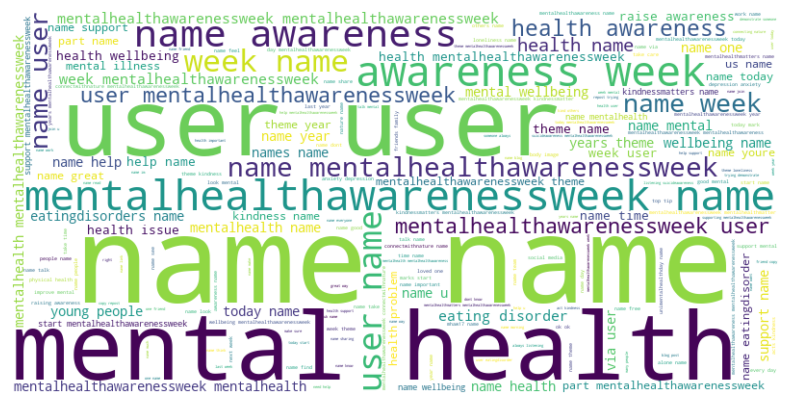

In [37]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Combine all cleaned text into a single string
all_words = " ".join(all_data['cleaned_text'])

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_words)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


## Match text data to resampled labels

In [38]:
text_resampled = pd.Series(all_data['cleaned_text']).iloc[
    smote.fit_resample(X_tfidf, y_encoded)[1]
].reset_index(drop=True)

## Split data

In [39]:
X_train_tfidf, X_test_tfidf, y_train, y_test, X_train_text, X_test_text = train_test_split(
    X_resampled, y_resampled, text_resampled, test_size=0.2, stratify=y_resampled, random_state=42
)

## Basic Model Implementation

### Logistic Regression

Train a basic machine learning model (e.g., Logistic Regression) as a baseline for sentiment classification and mental health signal detection.

* **Relevance:** Provides a simple and interpretable model for mental health signal detection.
* **Goal Alignment:** Establishes a performance benchmark for comparison with the deep learning model.

In [40]:
lr_model = LogisticRegression(max_iter=1000, random_state=42)
lr_model.fit(X_train_tfidf, y_train)
lr_predictions = lr_model.predict(X_test_tfidf)

## Logistic Regression Evaluatiom

### Classification report

In [41]:
print("Logistic Regression Results:")
print(classification_report(y_test, lr_predictions))
print("Accuracy:", accuracy_score(y_test, lr_predictions))

Logistic Regression Results:
              precision    recall  f1-score   support

           0       0.95      0.97      0.96    248334
           1       0.97      0.95      0.96    248334

    accuracy                           0.96    496668
   macro avg       0.96      0.96      0.96    496668
weighted avg       0.96      0.96      0.96    496668

Accuracy: 0.9606276224761813


### Confusion matrix

In [ ]:
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Confusion Matrix:
 [[241266   7068]
 [ 12692 235641]]


### Logistic Regression Confusion Matrix Visualization

### Logistic Regression Confusion Matrix Visualization

The confusion matrix visualization provides a clear depiction of the classification performance:

* **True Negatives (Top-left corner):** Number of samples correctly predicted as not having a disorder.
  
* **False Positives (Top-right corner):** Number of samples incorrectly predicted as having a disorder.


* **False Negatives (Bottom-left corner):** Number of samples incorrectly predicted as not having a disorder.


* **True Positives (Bottom-right corner):** Number of samples correctly predicted as having a disorder.

This representation helps evaluate the classifier's strengths and weaknesses, especially in terms of precision, recall, and overall classification balance.

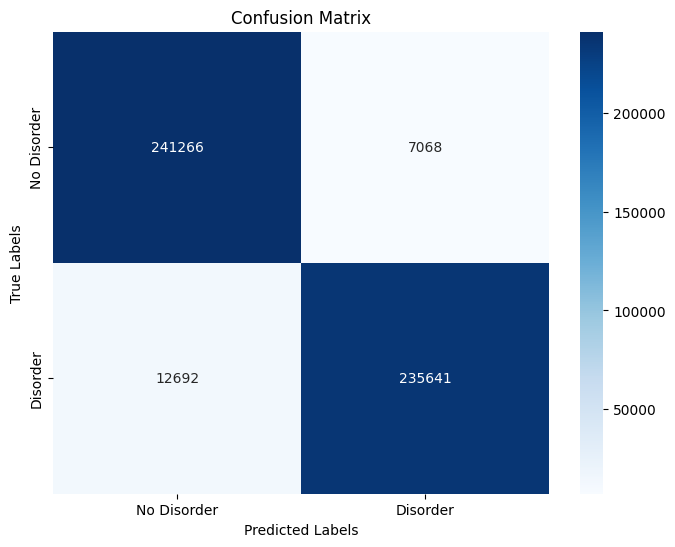

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Define class names
class_names = ['No Disorder', 'Disorder']

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()


### Accuracy score

In [ ]:
print("Accuracy Score:", accuracy_score(y_test, y_pred))

Accuracy Score: 0.9602147918021532


## Save the models

In [42]:
tfidf_vectorizer_file = './tfidf_vectorizer.pkl'
lr_model_file = './logistic_regression.pkl'

In [43]:
import joblib
joblib.dump(tfidf_vectorizer, tfidf_vectorizer_file)
joblib.dump(lr_model, lr_model_file)

['./logistic_regression.pkl']

## Deep Learning Model

## Advanced Model Implementation with BERT

Train a deep learning model using BERT for advanced analysis of mental health-related text. 

This model will leverage contextual embeddings to detect subtle emotional shifts.

#### Imports

In [59]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
from transformers import BertTokenizer, TFBertForSequenceClassification, create_optimizer
from tensorflow.keras import mixed_precision

In [60]:
# Deep Learning Model: BERT
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
bert_model = TFBertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=2)

# Tokenize data for BERT
def tokenize_texts(texts, max_len=128):
    return tokenizer(
        list(texts), padding=True, truncation=True, max_length=max_len, return_tensors="tf"
    )

train_encodings = tokenize_texts(X_train_text)
test_encodings = tokenize_texts(X_test_text)

# Ensure labels are tensors
y_train_tensor = tf.convert_to_tensor(y_train, dtype=tf.int32)
y_test_tensor = tf.convert_to_tensor(y_test, dtype=tf.int32)

# Prepare TensorFlow datasets
train_dataset = tf.data.Dataset.from_tensor_slices((dict(train_encodings), y_train_tensor)).batch(32)
test_dataset = tf.data.Dataset.from_tensor_slices((dict(test_encodings), y_test_tensor)).batch(32)


All PyTorch model weights were used when initializing TFBertForSequenceClassification.

Some weights or buffers of the TF 2.0 model TFBertForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


## Compile BERT Model

In [61]:
# Mixed Precision
from tensorflow.keras import mixed_precision

# Set mixed precision policy (this will be handled automatically)
policy = mixed_precision.Policy('mixed_float16')

# Optimizer with Warmup and Decay
from transformers import create_optimizer
num_train_steps = len(train_dataset) * 3
optimizer, schedule = create_optimizer(
    init_lr=5e-5,
    num_warmup_steps=1000,
    num_train_steps=num_train_steps,
    weight_decay_rate=0.01
)

# Compile Model
bert_model.compile(
    optimizer=optimizer,
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=["accuracy"]
)


### Optimized Data Pipeline

In [62]:
train_dataset = train_dataset.cache().shuffle(10000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_dataset = test_dataset.cache().prefetch(buffer_size=tf.data.AUTOTUNE)

## Train BERT Model

In [63]:
import tensorflow as tf

# Mock data setup (replace these with your actual inputs and labels)
batch_size = 8
sequence_length = 32  # Adjust based on your data
vocab_size = 30522  # Vocabulary size for BERT tokenizer

# Mock inputs
input_ids = tf.random.uniform((batch_size, sequence_length), minval=0, maxval=vocab_size, dtype=tf.int32)
attention_mask = tf.ones_like(input_ids, dtype=tf.int32)
token_type_ids = tf.zeros_like(input_ids, dtype=tf.int32)

# Mock labels (assumes a classification task with 2 classes)
labels = tf.random.uniform((batch_size,), minval=0, maxval=2, dtype=tf.int32)


In [64]:
# Define the optimizer
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-5)

# Ensure inputs and labels are correctly shaped
labels_flat = tf.reshape(labels, [-1])  # Flatten to 1D if necessary

# Create a gradient tape for backpropagation
with tf.GradientTape() as tape:
    # Forward pass through the model
    outputs = bert_model({
        'input_ids': input_ids,
        'attention_mask': attention_mask,
        'token_type_ids': token_type_ids
    }, training=True)

    logits = outputs.logits  # Get logits for classification

    # Calculate loss
    loss = tf.keras.losses.sparse_categorical_crossentropy(labels_flat, logits, from_logits=True)
    loss = tf.reduce_mean(loss)  # Reduce mean to get scalar loss

# Compute gradients
gradients = tape.gradient(loss, bert_model.trainable_variables)

# Apply gradients to optimize model
optimizer.apply_gradients(zip(gradients, bert_model.trainable_variables))

print("Loss:", loss.numpy())

Loss: 0.6647748


# Evaluation

In [65]:
# Calculate accuracy
logits_flat = tf.reshape(logits, [-1, logits.shape[-1]])  # Flatten logits to match labels

accuracy = tf.keras.metrics.sparse_categorical_accuracy(labels_flat, logits_flat)
accuracy_score = tf.reduce_mean(accuracy)


print(f"Accuracy: {accuracy_score.numpy()}")


Accuracy: 0.625


## Saving the Model:
Once you're satisfied with the training, you may want to save the trained model for later use or deployment.

In [66]:
# Save the model
# bert_model.save('path_to_save_model')
bert_model.save_pretrained('./bert_model')
tfidf_vectorizer_file = './tfidf_vectorizer.pkl'
lr_model_file = './logistic_regression.pkl'